In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler

import warnings 
warnings.filterwarnings("ignore")

In [18]:
#data collection
data = pd.read_csv("CarPrice_Assignment.csv") 
xlsx_file_path ="Data Dictionary - carprices.xlsx"
add_data = pd.read_excel(xlsx_file_path)

In [16]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
data.shape


(205, 26)

In [24]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [26]:
data.duplicated().sum()

0

In [27]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [28]:
#correlation
cor_data=data.corr()
cor_data


C:\Users\ANANDAPERUMAL ELANGO\AppData\Local\Temp\ipykernel_4164\1340811830.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_data=data.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


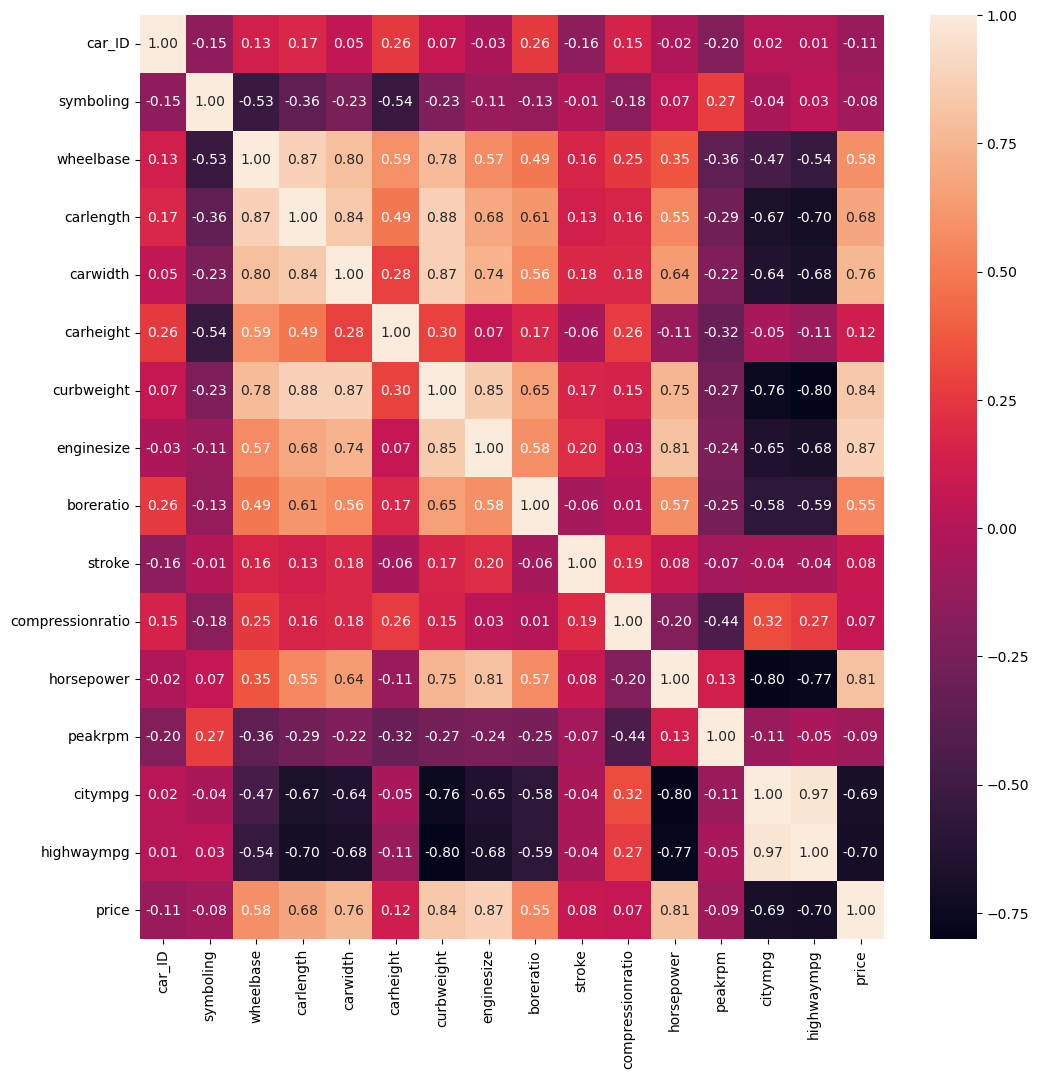

In [31]:
#visualization of correlation of data
plt.figure(figsize=(12,12))
sns.heatmap(cor_data,annot=True,fmt=".2f")
plt.show()


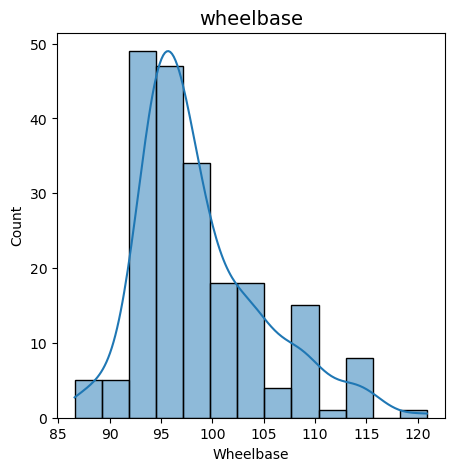

In [33]:
plt.figure(figsize=(5,5))
sns.histplot(data["wheelbase"], kde=True)
plt.title("wheelbase", fontsize=14)
plt.xlabel("Wheelbase")
plt.ylabel("Count")
plt.show()

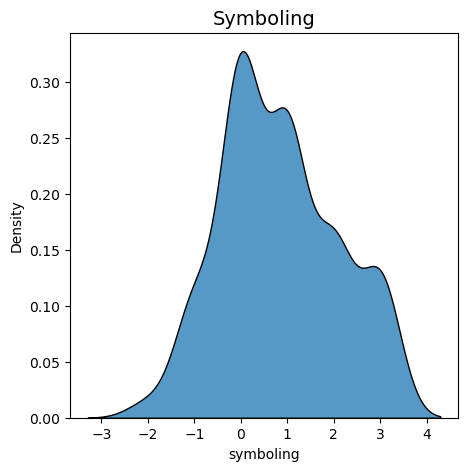

In [37]:
plt.figure(figsize=(5,5))
sns.kdeplot(data, x="symboling", hue=None, multiple="stack")
plt.title("Symboling", fontsize=14)
plt.show()

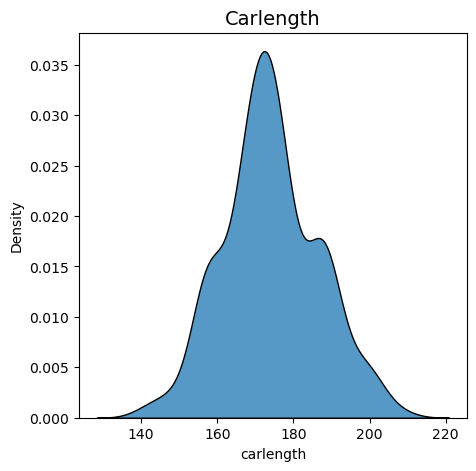

In [36]:
plt.figure(figsize=(5,5))
sns.kdeplot(data, x="carlength", hue=None, multiple="stack")
plt.title("Carlength", fontsize=14)
plt.show()

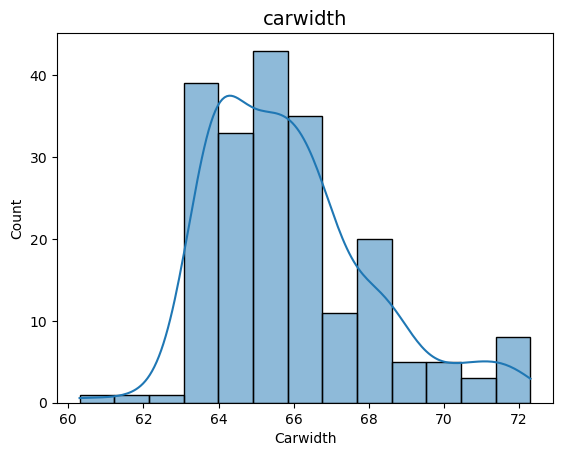

In [38]:
sns.histplot(data["carwidth"], kde=True)
plt.title("carwidth", fontsize=14)
plt.xlabel("Carwidth")
plt.ylabel("Count")
plt.show()

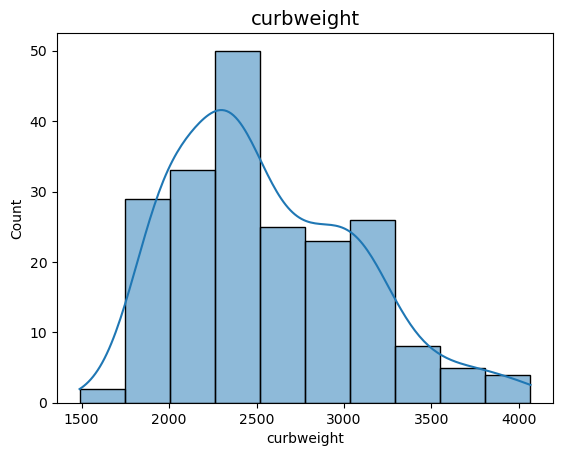

In [39]:
sns.histplot(data["curbweight"], kde=True)
plt.title("curbweight", fontsize=14)
plt.xlabel("curbweight")
plt.ylabel("Count")
plt.show()

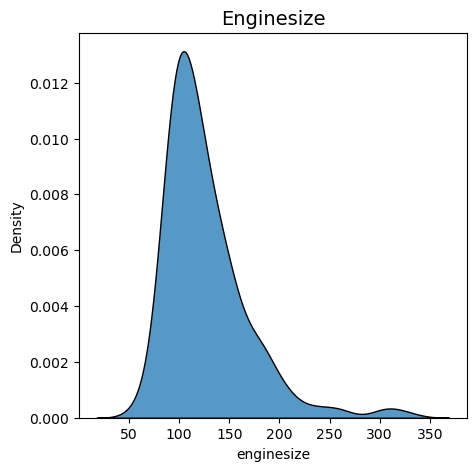

In [40]:
plt.figure(figsize=(5,5))
sns.kdeplot(data, x="enginesize", hue=None, multiple="stack")
plt.title("Enginesize", fontsize=14)
plt.show()

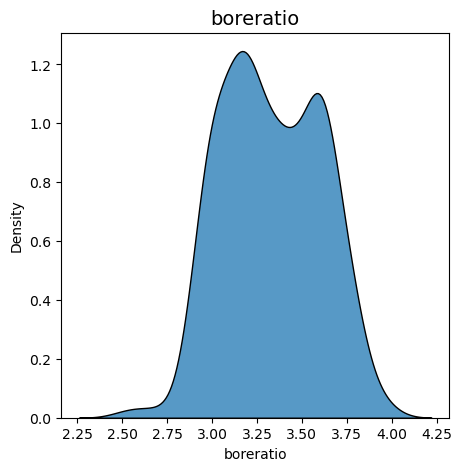

In [41]:
plt.figure(figsize=(5,5))
sns.kdeplot(data, x="boreratio", hue=None, multiple="stack")
plt.title("boreratio", fontsize=14)
plt.show()

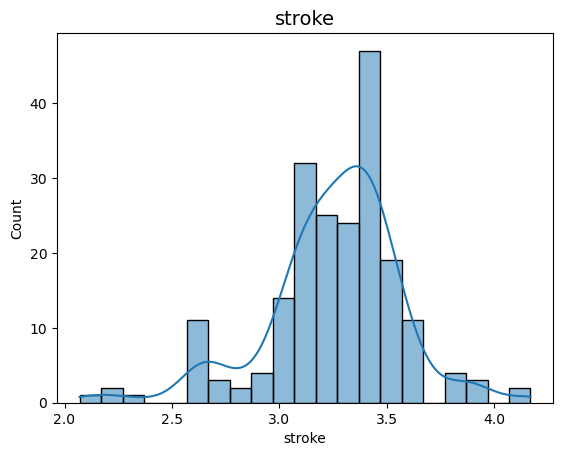

In [42]:
sns.histplot(data["stroke"], kde=True)
plt.title("stroke", fontsize=14)
plt.xlabel("stroke")
plt.ylabel("Count")
plt.show()

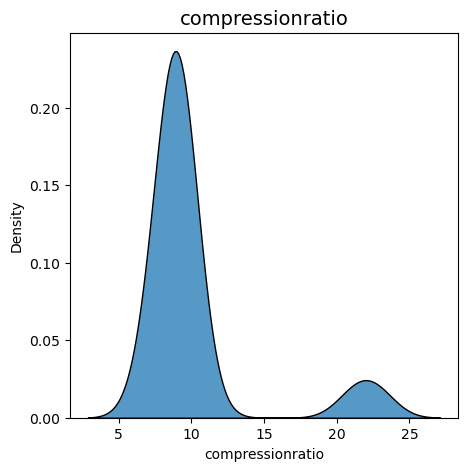

In [43]:
plt.figure(figsize=(5,5))
sns.kdeplot(data, x="compressionratio", hue=None, multiple="stack")
plt.title("compressionratio", fontsize=14)
plt.show()

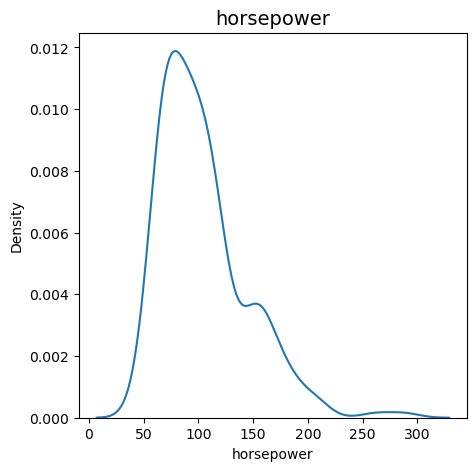

In [44]:
plt.figure(figsize=(5,5))
sns.kdeplot(data, x="horsepower", hue=None)
plt.title("horsepower", fontsize=14)
plt.show()

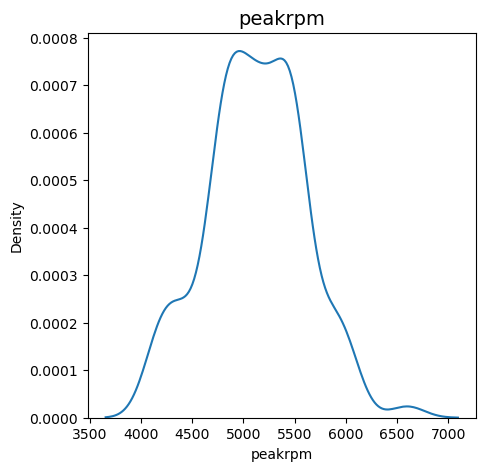

In [45]:
plt.figure(figsize=(5,5))
sns.kdeplot(data, x="peakrpm", hue=None)
plt.title("peakrpm", fontsize=14)
plt.show()

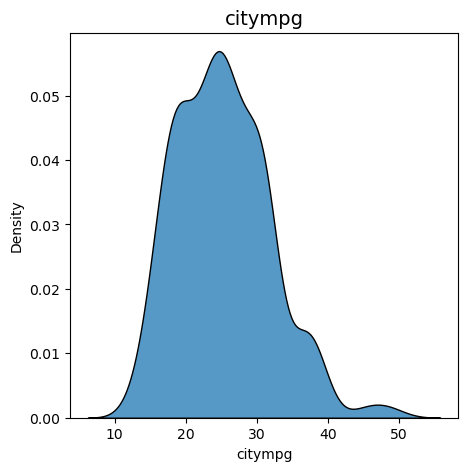

In [46]:
plt.figure(figsize=(5,5))
sns.kdeplot(data, x="citympg", hue=None, multiple="stack")
plt.title("citympg", fontsize=14)
plt.show()

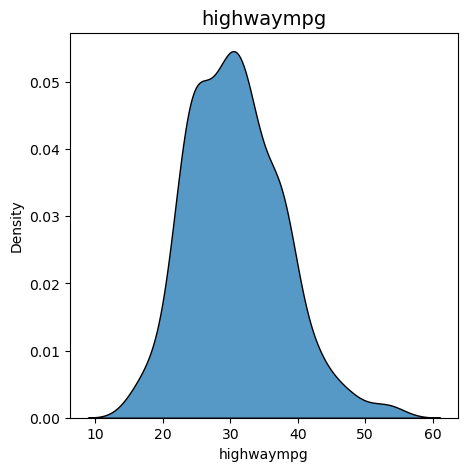

In [47]:
plt.figure(figsize=(5,5))
sns.kdeplot(data, x="highwaympg", hue=None, multiple="stack")
plt.title("highwaympg", fontsize=14)
plt.show()

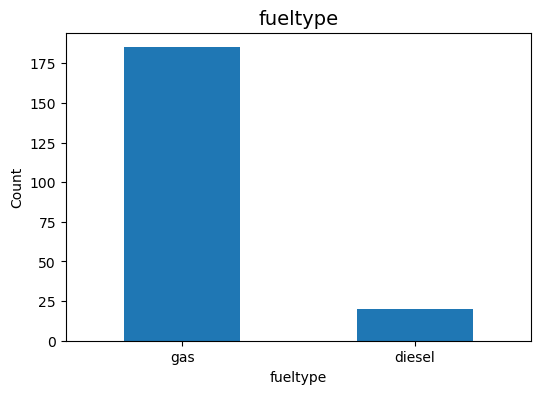

In [48]:
data["fueltype"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("fueltype", fontsize=14)
plt.xlabel("fueltype")
plt.ylabel("Count")
plt.show()

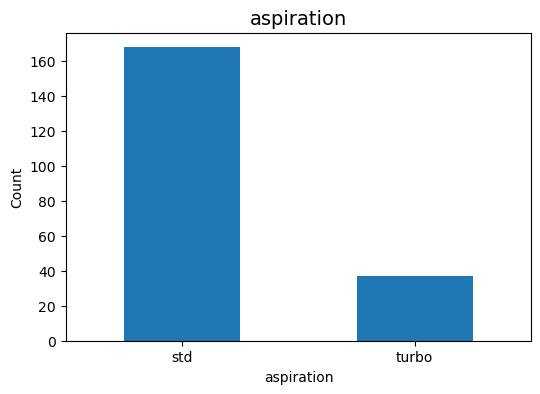

In [49]:
data["aspiration"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("aspiration", fontsize=14)
plt.xlabel("aspiration")
plt.ylabel("Count")
plt.show()

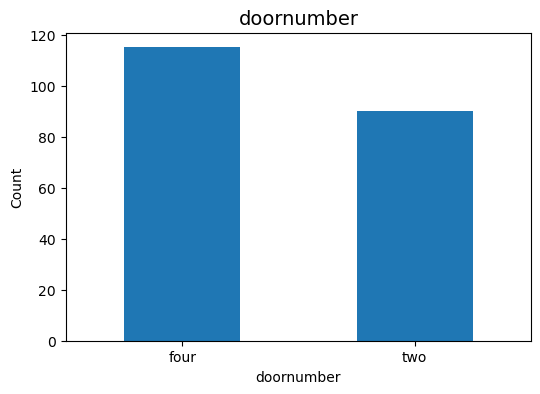

In [50]:
data["doornumber"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("doornumber", fontsize=14)
plt.xlabel("doornumber")
plt.ylabel("Count")
plt.show()

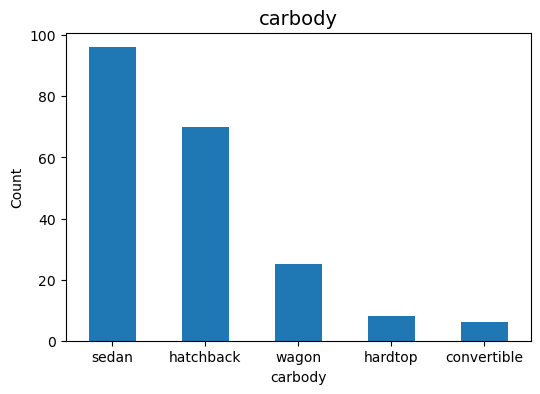

In [51]:
data["carbody"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("carbody", fontsize=14)
plt.xlabel("carbody")
plt.ylabel("Count")
plt.show()

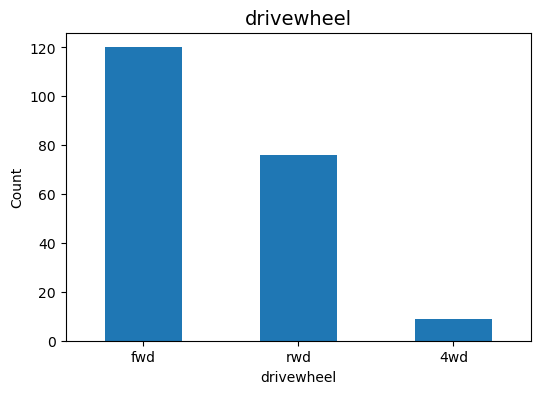

In [52]:
data["drivewheel"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("drivewheel", fontsize=14)
plt.xlabel("drivewheel")
plt.ylabel("Count")
plt.show()

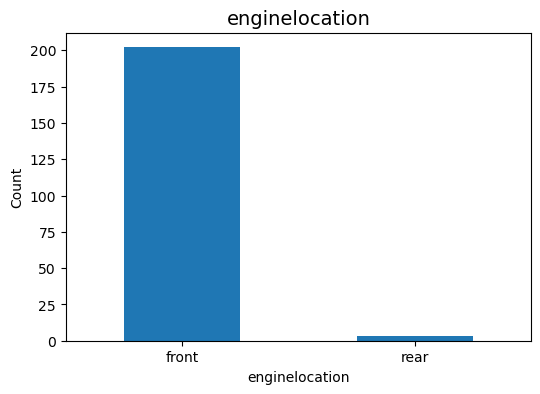

In [53]:
data["enginelocation"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("enginelocation", fontsize=14)
plt.xlabel("enginelocation")
plt.ylabel("Count")
plt.show()

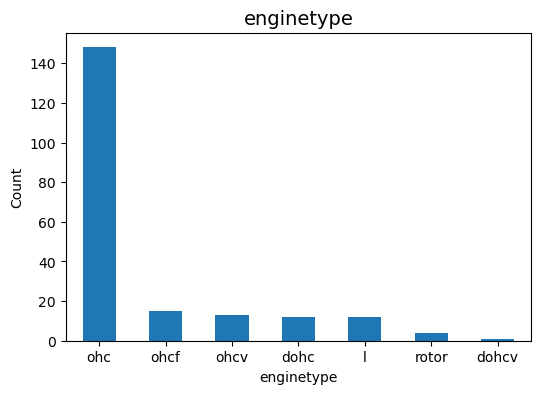

In [54]:
data["enginetype"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("enginetype", fontsize=14)
plt.xlabel("enginetype")
plt.ylabel("Count")
plt.show()

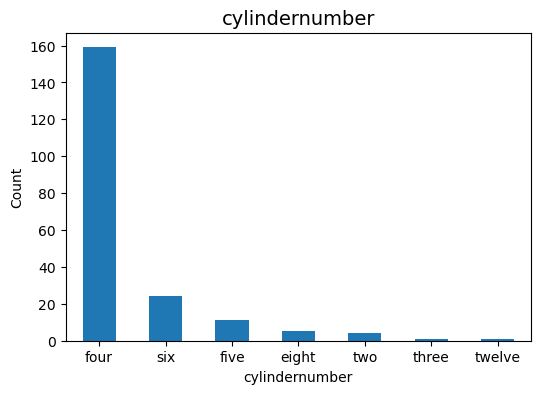

In [55]:
data["cylindernumber"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("cylindernumber", fontsize=14)
plt.xlabel("cylindernumber")
plt.ylabel("Count")
plt.show()

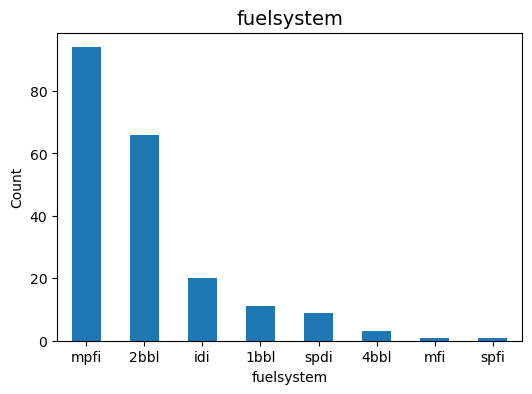

In [56]:
data["fuelsystem"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("fuelsystem", fontsize=14)
plt.xlabel("fuelsystem")
plt.ylabel("Count")
plt.show()

In [67]:
selected_features = ['citympg','highwaympg' ,'enginesize']#, 'fueltype']  # Choose relevant features
X = data[selected_features]
y = data['price']


In [68]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
'''categorical_features = ['fuel_type']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
'''



In [71]:
#model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [74]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 2930.389172411654
Mean Squared Error: 17531780.54108662
R-squared: 0.7779213631921272


In [78]:
root_mean_squared_error=[]
r2=[]
model_names=[]

# Create the Model
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)

models = [rf,gb,et]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    root_mean_squared_error.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2.append(r2_score(y_test, y_pred))
   
    
model_names = ['RandomForest','GradientBoost','ExtraTree']
result_df = pd.DataFrame({'RMSE':root_mean_squared_error,'R2_score': r2},index=model_names)
result_df

,RMSE,R2_score
RandomForest,2036.534826,0.947463
GradientBoost,2472.059371,0.922590
ExtraTree,2465.250938,0.923016


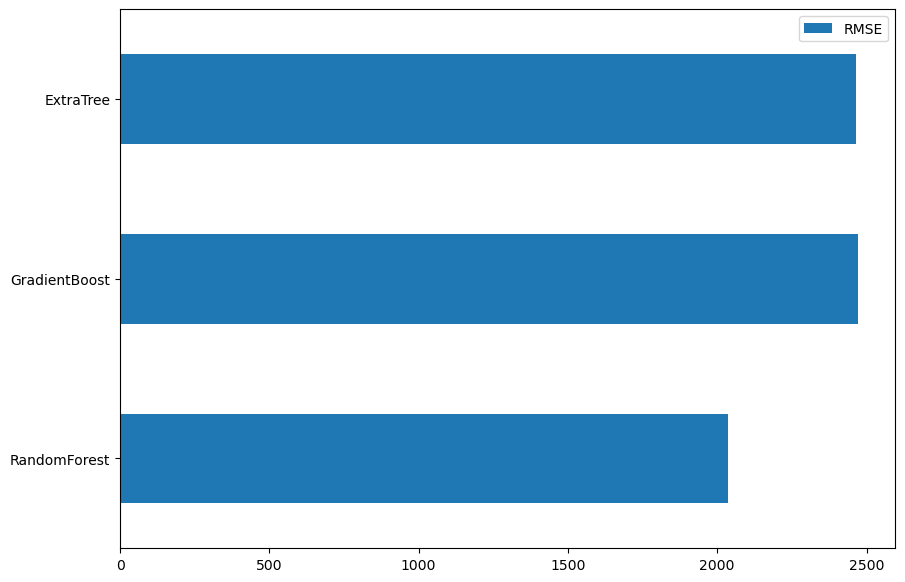

In [82]:
result_df["RMSE"].plot(kind="barh", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));